# **Analysis of Diabetes Risk in India**

## Objectives

* Create a comprehensive data analysis tool designed to help medical professionals in streamlining data exploration, analysis, and visualisation to analyze impact of behavioural and lifestyle factors on risk of diabetes in young adults of India.

## Inputs

* Data source: https://www.kaggle.com/datasets/ankushpanday1/diabetes-in-youth-vs-adult-in-india


## Outputs

* A jupyter notebook file (Diabetes Risk Analysis (Hackathon1.ipynb) to showcase the data analysis.
* A code that helps in conducting descriptive analysis, predicting possible diabetes outcome.
.



---

# Working directory

Changed the working directory from its current folder to its parent folder
* Accessing the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Analysis_of_diabetes_risk-/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm new directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Analysis_of_diabetes_risk-'

# Section 1 :  Data Extraction, Transformation, and Loading (ETL) 

In [4]:
# Setting up & Importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
import plotly.express as px

In [5]:
# Loading the dataset in Diabetes datafrrame
diabetes_df= pd.read_csv('diabetes young adults india.csv')

In [6]:
#Preview of top 15 entries in dataset
top_rows= diabetes_df.head(15)

In [7]:
# Making a list of all Column names
Df_cols= [diabetes_df.columns]
Df_cols

[Index(['ID', 'Age', 'Gender', 'Region', 'Family_Income',
        'Family_History_Diabetes', 'Parent_Diabetes_Type', 'Genetic_Risk_Score',
        'BMI', 'Physical_Activity_Level', 'Dietary_Habits', 'Fast_Food_Intake',
        'Smoking', 'Alcohol_Consumption', 'Fasting_Blood_Sugar', 'HbA1c',
        'Cholesterol_Level', 'Prediabetes', 'Diabetes_Type', 'Sleep_Hours',
        'Stress_Level', 'Screen_Time'],
       dtype='object')]

In [8]:
# Total number of rows and columns in Diabetes dataframe
diabetes_df.shape
print(f"There are {diabetes_df.shape[0]} rows and {diabetes_df.shape[1]} columns in the Diabetes Dataframe.")

There are 100000 rows and 22 columns in the Diabetes Dataframe.


In [9]:
# Dictionary to store value counts for each column
value_check = {}

# Iterate through each column in the DataFrame
for column in diabetes_df.columns:
    value_check[column] = diabetes_df[column].value_counts()

# Display the value counts for each column in a more readable format
for column, counts in value_check.items():
    print(f"\nValues in column '{column}':")
    print(counts.head(10).to_frame().reset_index().rename(columns={'index': 'Value', column: 'Count'}))

# To save the summarized value counts
summary_df = pd.concat([counts.head(10).to_frame().reset_index().rename(columns={
                                               'index': 'Value', column: 'Count'}) 
for column, counts in value_check.items()], keys=value_check.keys(), names=['Column', 'Row'])




Values in column 'ID':
   Value  Count
0      1      1
1  66651      1
2  66673      1
3  66672      1
4  66671      1
5  66670      1
6  66669      1
7  66668      1
8  66667      1
9  66666      1

Values in column 'Age':
   Value  Count
0     24   9259
1     21   9205
2     20   9194
3     18   9127
4     23   9123
5     19   9089
6     15   9031
7     22   9030
8     17   9006
9     16   9005

Values in column 'Gender':
    Value  Count
0  Female  48073
1    Male  47964
2   Other   3963

Values in column 'Region':
       Value  Count
0      North  16768
1       East  16751
2  Northeast  16677
3      South  16650
4       West  16607
5    Central  16547

Values in column 'Family_Income':
     Value  Count
0   652308      3
1   929543      3
2  1745785      3
3  1121039      3
4  2071659      3
5  2127636      3
6  1843841      3
7  1780574      3
8   268269      3
9  1849512      3

Values in column 'Family_History_Diabetes':
  Value  Count
0    No  64912
1   Yes  35088

Values in c

In [10]:
# Checking initial information on Index, Datatypes and Memory used
Dataframe_info= diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100000 non-null  int64  
 1   Age                      100000 non-null  int64  
 2   Gender                   100000 non-null  object 
 3   Region                   100000 non-null  object 
 4   Family_Income            100000 non-null  int64  
 5   Family_History_Diabetes  100000 non-null  object 
 6   Parent_Diabetes_Type     100000 non-null  object 
 7   Genetic_Risk_Score       100000 non-null  int64  
 8   BMI                      100000 non-null  float64
 9   Physical_Activity_Level  100000 non-null  object 
 10  Dietary_Habits           100000 non-null  object 
 11  Fast_Food_Intake         100000 non-null  int64  
 12  Smoking                  100000 non-null  object 
 13  Alcohol_Consumption      100000 non-null  object 
 14  Fasti

In [11]:
 
# Checking for unique values in columns with objects
# Create a dictionary to store unique values for each specified column
unique_values = {
                'Gender': diabetes_df['Gender'].unique().tolist(), 
                'Region': diabetes_df['Region'].unique().tolist(),
                'Physical_Activity_Level': diabetes_df['Physical_Activity_Level'].unique().tolist(),
                'Dietary_Habits': diabetes_df['Dietary_Habits'].unique().tolist(),
                'Alcohol_Consumption': diabetes_df['Alcohol_Consumption'].unique().tolist(),
                'Smoking': diabetes_df['Smoking'].unique().tolist()
                }   
unique_behaviour_df = pd.DataFrame.from_dict(unique_values, orient='index')     

In [12]:
# Display the unique values for each specified column 
for column, values in unique_values.items(): 
    print(f"Unique values for column '{column}':") 
    print(values) 
    print("\n")

Unique values for column 'Gender':
['Male', 'Female', 'Other']


Unique values for column 'Region':
['North', 'Central', 'Northeast', 'East', 'West', 'South']


Unique values for column 'Physical_Activity_Level':
['Sedentary', 'Active', 'Moderate']


Unique values for column 'Dietary_Habits':
['Moderate', 'Unhealthy', 'Healthy']


Unique values for column 'Alcohol_Consumption':
['No', 'Yes']


Unique values for column 'Smoking':
['Yes', 'No']




In [13]:
#Checking for any duplicate values
duplicates_check= diabetes_df.duplicated().any()
print (f'Any duplicate values:',duplicates_check)

Any duplicate values: False


In [14]:
# Checking for missing values in  dataset
missingvalues_check= diabetes_df.isnull().sum()
missingvalues_check

ID                         0
Age                        0
Gender                     0
Region                     0
Family_Income              0
Family_History_Diabetes    0
Parent_Diabetes_Type       0
Genetic_Risk_Score         0
BMI                        0
Physical_Activity_Level    0
Dietary_Habits             0
Fast_Food_Intake           0
Smoking                    0
Alcohol_Consumption        0
Fasting_Blood_Sugar        0
HbA1c                      0
Cholesterol_Level          0
Prediabetes                0
Diabetes_Type              0
Sleep_Hours                0
Stress_Level               0
Screen_Time                0
dtype: int64

In [15]:
#Dropping data columns not going to be used in further analysis
col_dropped= [
              'ID',
              'Family_Income', 
              'Family_History_Diabetes',
              'Parent_Diabetes_Type', 
              'Fasting_Blood_Sugar',
              'Genetic_Risk_Score',
              'Cholesterol_Level',
              'Prediabetes',
              'Diabetes_Type'
              ]                               
diabetes_df= diabetes_df.drop(columns= col_dropped)

In [16]:
#Predictive analysis
# Creating a diabetes_outcome column based on HbA1c test levels 
diabetes_df['Diabetes_Outcome'] = diabetes_df['HbA1c'].apply( 
                                                             lambda x: 'Positive' if x >= 6.5 else 
                                                             ('Negative' if x <= 5.7 else 'Prediabetic') )

diabetes_df.head()

,Age,Gender,Region,BMI,Physical_Activity_Level,Dietary_Habits,Fast_Food_Intake,Smoking,Alcohol_Consumption,HbA1c,Sleep_Hours,Stress_Level,Screen_Time,Diabetes_Outcome
0,21,Male,North,31.4,Sedentary,Moderate,1,Yes,No,9.5,7.7,7,6.8,Positive
1,18,Female,Central,24.4,Active,Unhealthy,5,No,No,5.0,7.9,8,6.0,Negative
2,25,Male,North,20.0,Moderate,Moderate,2,No,No,8.3,7.6,8,4.6,Positive
3,22,Male,Northeast,39.8,Moderate,Unhealthy,4,No,Yes,4.6,9.5,2,10.9,Negative
4,19,Male,Central,19.2,Moderate,Moderate,0,No,Yes,5.3,6.4,2,1.3,Negative


In [17]:
# Pipepline to change category values into numeric values 
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder

# Create the pipeline with ordinal encoder
pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder())
])

# Apply the pipeline to the DataFrame
diabetes_clean_df = pipeline.fit_transform(diabetes_df)

# Display the cleaned DataFrame
diabetes_clean_df


,Age,Gender,Region,BMI,Physical_Activity_Level,Dietary_Habits,Fast_Food_Intake,Smoking,Alcohol_Consumption,HbA1c,Sleep_Hours,Stress_Level,Screen_Time,Diabetes_Outcome
0,21,1,1,31.4,1,1,1,1,1,9.5,7.7,7,6.8,1
1,18,2,2,24.4,2,2,5,2,1,5.0,7.9,8,6.0,2
2,25,1,1,20.0,3,1,2,2,1,8.3,7.6,8,4.6,1
3,22,1,3,39.8,3,2,4,2,2,4.6,9.5,2,10.9,2
4,19,1,2,19.2,3,1,0,2,2,5.3,6.4,2,1.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19,2,6,39.6,1,1,7,2,2,9.8,4.1,8,9.5,1
99996,18,2,2,18.4,2,1,8,2,1,8.9,6.4,5,4.1,1
99997,23,2,2,35.5,1,2,9,2,1,9.2,8.5,10,11.1,1
99998,24,1,5,34.8,3,1,8,2,1,9.8,5.3,7,2.1,1


In [18]:
pipeline.fit(diabetes_df)

# Accessing the OrdinalEncoder instance after fitting
encoder = pipeline.named_steps['ordinal_encoder']

# Accessing the mappings from the OrdinalEncoder in category_encoders
mappings = encoder.mapping

# Displaying the mappings for each feature
for mapping in mappings:
    print(f"Feature: {mapping['col']}, Mappings: {mapping['mapping']}")

Feature: Gender, Mappings: Male      1
Female    2
Other     3
NaN      -2
dtype: int64
Feature: Region, Mappings: North        1
Central      2
Northeast    3
East         4
West         5
South        6
NaN         -2
dtype: int64
Feature: Physical_Activity_Level, Mappings: Sedentary    1
Active       2
Moderate     3
NaN         -2
dtype: int64
Feature: Dietary_Habits, Mappings: Moderate     1
Unhealthy    2
Healthy      3
NaN         -2
dtype: int64
Feature: Smoking, Mappings: Yes    1
No     2
NaN   -2
dtype: int64
Feature: Alcohol_Consumption, Mappings: No     1
Yes    2
NaN   -2
dtype: int64
Feature: Diabetes_Outcome, Mappings: Positive       1
Negative       2
Prediabetic    3
NaN           -2
dtype: int64


# Cleaning any NAN values
diabetes_clean_df= diabetes_clean_df.dropna()

In [19]:
# Descrpitive Statistics Overview
Summary_stats= diabetes_clean_df.describe()

Summary_stats

,Age,Gender,Region,BMI,Physical_Activity_Level,Dietary_Habits,Fast_Food_Intake,Smoking,Alcohol_Consumption,HbA1c,Sleep_Hours,Stress_Level,Screen_Time,Diabetes_Outcome
count,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,20.007890,1.55999,3.49832,28.028089,1.798090,1.900000,4.988580,1.697860,1.197860,7.006461,6.988082,5.50681,6.503842,1.523600
std,3.154934,0.57067,1.70827,6.924196,0.871246,0.828086,3.169762,0.459188,0.398388,1.735327,1.734122,2.87943,3.170210,0.693951
min,15.000000,1.00000,1.00000,16.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.00000,1.000000,1.000000
25%,17.000000,1.00000,2.00000,22.100000,1.000000,1.000000,2.000000,1.000000,1.000000,5.500000,5.500000,3.00000,3.800000,1.000000
50%,20.000000,2.00000,4.00000,28.000000,1.000000,2.000000,5.000000,2.000000,1.000000,7.000000,7.000000,6.00000,6.500000,1.000000
75%,23.000000,2.00000,5.00000,34.000000,3.000000,3.000000,8.000000,2.000000,1.000000,8.500000,8.500000,8.00000,9.300000,2.000000
max,25.000000,3.00000,6.00000,40.000000,3.000000,3.000000,10.000000,2.000000,2.000000,10.000000,10.000000,10.00000,12.000000,3.000000


Pipeline functions

In [20]:
   # Correlating data analysis
corr_analysis= diabetes_df.corr(method='pearson')
corr_analysis

,Age,BMI,Fast_Food_Intake,HbA1c,Sleep_Hours,Stress_Level,Screen_Time
Age,1.000000,-0.000482,0.006896,0.006189,-0.000743,0.004517,0.000513
BMI,-0.000482,1.000000,-0.002043,0.005600,-0.002895,-0.000203,-0.005156
Fast_Food_Intake,0.006896,-0.002043,1.000000,0.001768,-0.008323,-0.001666,-0.001891
HbA1c,0.006189,0.005600,0.001768,1.000000,-0.003240,0.002687,0.002138
Sleep_Hours,-0.000743,-0.002895,-0.008323,-0.003240,1.000000,-0.002203,0.002309
Stress_Level,0.004517,-0.000203,-0.001666,0.002687,-0.002203,1.000000,0.001587
Screen_Time,0.000513,-0.005156,-0.001891,0.002138,0.002309,0.001587,1.000000


---

# Data Visualisation

---

In [21]:
# The dataset is too big for project timescope
# Randomly selected 500 records

diabetes_clean_df = diabetes_clean_df.sample(n=500, random_state=42)

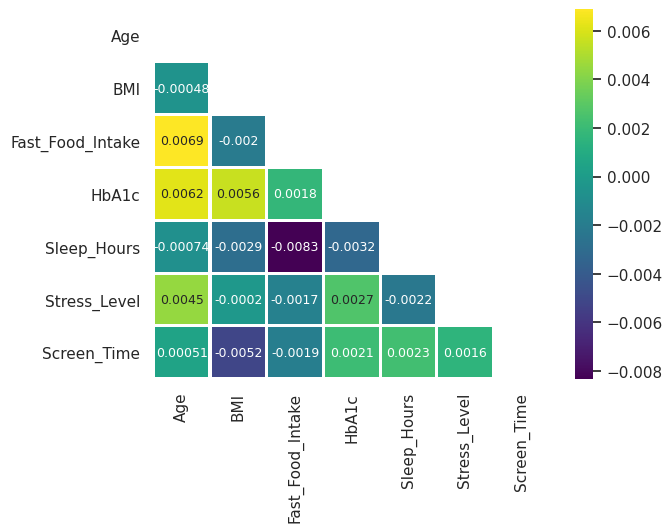

In [22]:
sns.set_palette("viridis")
sns.set_style("whitegrid")

sns.set_theme(style="whitegrid")
mask = np.zeros_like(corr_analysis, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_analysis,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 9},linewidths=1.5)
plt.ylim(corr_analysis.shape[1],0);
plt.show()



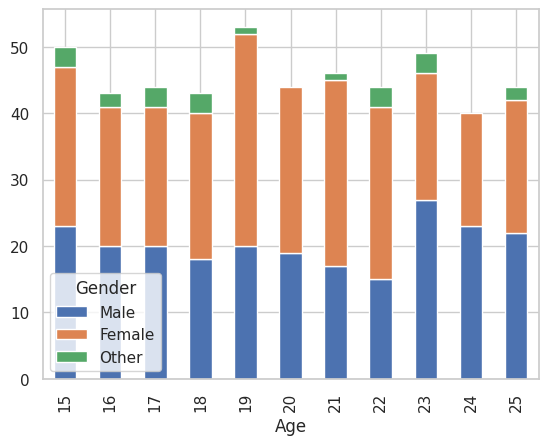

In [23]:
# Group by 'Age' and 'Gender' and create a stacked bar plot
ax = diabetes_clean_df.groupby(['Age','Gender']).size().unstack().plot(kind='bar', stacked=True)

# Set the legend labels
ax.legend(title='Gender', labels=['Male', 'Female', 'Other'])

# Show the plot
plt.show()

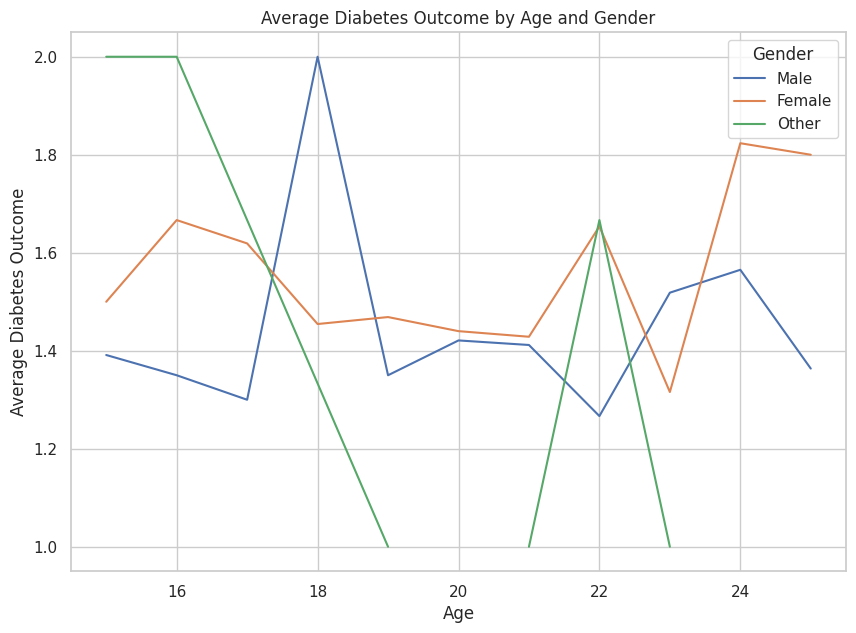

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming diabetes_clean_df is your DataFrame
# Group by 'Age' and calculate the average Diabetes_Outcome for each gender
grouped_data = diabetes_clean_df.groupby(['Age', 'Gender'], as_index=False).agg(AvgOutcome=('Diabetes_Outcome', 'mean'))

# Pivot the data to get separate columns for each gender
pivot_data = grouped_data.pivot(index='Age', columns='Gender', values='AvgOutcome')

# Plot the data
pivot_data.plot(kind='line', figsize=(10, 7))
plt.xlabel('Age')
plt.ylabel('Average Diabetes Outcome')

# Set custom labels for the legend
gender_labels = ['Male', 'Female', 'Other']  # Adjust this list as needed depending on your dataset
plt.title('Average Diabetes Outcome by Age and Gender')
plt.legend(title='Gender', labels=gender_labels)
plt.show()


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [25]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (553063055.py, line 5)